# Load and explore an audio dataset

In [2]:
from datasets import load_dataset

minds = load_dataset(
    "PolyAI/minds14",
    name="en-AU",
    split="train",
    trust_remote_code=True
)
minds

Generating train split: 654 examples [00:00, 15341.50 examples/s]


Dataset({
    features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
    num_rows: 654
})

In [5]:
example = minds[0]
example

{'path': 'C:\\Users\\placasa\\.cache\\huggingface\\datasets\\downloads\\extracted\\e0ec044e7ce839a98c449eb0ae1ba96bb351ad48044ecd3bcfeead1365376a56\\en-AU~PAY_BILL\\response_4.wav',
 'audio': {'path': 'C:\\Users\\placasa\\.cache\\huggingface\\datasets\\downloads\\extracted\\e0ec044e7ce839a98c449eb0ae1ba96bb351ad48044ecd3bcfeead1365376a56\\en-AU~PAY_BILL\\response_4.wav',
  'array': array([ 0.        ,  0.00024414, -0.00024414, ..., -0.00024414,
          0.00024414,  0.0012207 ]),
  'sampling_rate': 8000},
 'transcription': 'I would like to pay my electricity bill using my card can you please assist',
 'english_transcription': 'I would like to pay my electricity bill using my card can you please assist',
 'intent_class': 13,
 'lang_id': 2}

In [7]:
id2label = minds.features["intent_class"].int2str
id2label(example["intent_class"])

'pay_bill'

In [8]:
columns_to_remove = ["lang_id", "english_transcription"]
minds = minds.remove_columns(columns_to_remove)
minds

Dataset({
    features: ['path', 'audio', 'transcription', 'intent_class'],
    num_rows: 654
})

In [9]:
import gradio as gr

def generate_audio():
    example = minds.shuffle()[0]
    audio = example["audio"]
    return (
        audio["sampling_rate"],
        audio["array"]
    ), id2label(example["intent_class"])

with gr.Blocks() as demo:
    with gr.Column():
        for _ in range(4):
            audio, label = generate_audio()
            output = gr.Audio(audio, label=label)

demo.launch(debug=True)

c:\Users\placasa\AppData\Local\miniconda3\envs\huggingface_audio_course_py311\Lib\site-packages\gradio\processing_utils.py:741: UserWarning: Trying to convert audio automatically from float64 to 16-bit int format.
  warnings.warn(warning.format(data.dtype))


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Keyboard interruption in main thread... closing server.


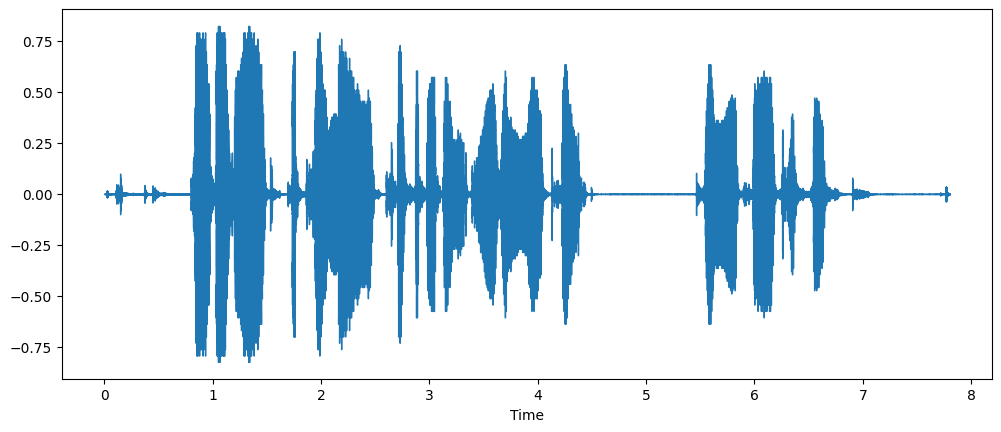

In [11]:
import librosa
import matplotlib.pyplot as plt
import librosa.display

array = example["audio"]["array"]
sampling_rate = example["audio"]["sampling_rate"]

plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)